In [1]:
# Dependencies
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import tim
import datetime
from iex import Stock

#import config 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys
consumer_key = "rEHjAMU0Srd1zNNzj24cAu2Od"
consumer_secret = "QGULbDQWFfG2U0JKR8px2K1uO5e6axvTtiJ491MhHA2xIYbAsS"
access_token = "2560678537-ErGKl2Ct61tnywxITovHtBPraZrlcnM0IBqDmoG"
access_token_secret = "cHdDA6vdA1Zzn7Is7poAis1yckA9wSSqDzvNBjSvOv78b"

# Twitter credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Create columns for dataframe
tweets_table = {'Tweet Number': '',
              'Tweet': '',
              'Compound Score': '',
              'Positive Score': '',
              'Negative Score': '',
              'Neutral Score': ''}

In [4]:
# Create list of news accounts
target_terms = ['@ElonMusk']

In [5]:
# Variable to hold list of the compound sentiment
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_number = []
text = []
created =[]
retweet = []

# Loop through all target users
for target in target_terms:
        
    # Run search around each tweet(Upto max of 200 tweets at once)
    screen_name = target
    public_tweets = api.user_timeline(target,
                                      count=200,result_type ="recent")
    
    # Index to see how many tweets for each news source
    index = 0
        
    # Loop through all tweets
    
    for tweet in public_tweets:
        
        news_organization = target
            
        # Run vader analysis on each tweet
        
        scores = analyzer.polarity_scores(tweet['text'])
        compound = scores['compound']
        pos = scores['pos']
        neu = scores['neu']
        neg = scores['neg']
            
        # Append values to empty lists
        
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        text.append(tweet['text'])
        tweet_number.append(index)
        tweet_date = datetime.datetime.strptime(tweet["created_at"], "%a %b %d %H:%M:%S %z %Y")
        convert_time = datetime.datetime.strftime(tweet_date, '%y-%m-%d')
        created.append(convert_time)
        retweet.append(tweet["retweet_count"])
        index = index + 1
        

In [6]:
len(public_tweets)

200

In [7]:
#Create dataframe from the lists appended above 

tweets_table['Tweet Number'] = tweet_number
tweets_table['Tweet'] = text
tweets_table['Compound Score'] = compound_list
tweets_table['Positive Score'] = positive_list
tweets_table['Negative Score'] = negative_list
tweets_table['Date'] = created
tweets_table['Retweet'] = retweet

tweets_table = pd.DataFrame(tweets_table)



# Drop rows from the end rows to match the array index for merging

tweets_table.drop(tweets_table.index[128:200],inplace=True)

tweets_table.tail()


,Tweet Number,Tweet,Compound Score,Positive Score,Negative Score,Neutral Score,Date,Retweet
123,123,"@JaneidyEve @ds23ytube Long-term, there will b...",0.4019,0.124,0.000,,18-09-18,88
124,124,"@perthguppy Yeah, Starlink should be active by...",0.5994,0.450,0.000,,18-09-18,167
125,125,@LisaPadgett @bocio777 @TArkesteijn Sorry! So ...,-0.2905,0.000,0.266,,18-09-18,21
126,126,Moon mission will be livestreamed in high def ...,0.4144,0.107,0.000,,18-09-18,24693
127,127,@bocio777 Perhaps one of the invited artists c...,0.0516,0.117,0.107,,18-09-18,40


In [8]:
#Stock Data 

tsla = Stock("TSLA")
tsla.book()

https://api.iextrading.com/1.0/stock/TSLA/book


{'quote': {'symbol': 'TSLA',
  'companyName': 'Tesla Inc.',
  'primaryExchange': 'Nasdaq Global Select',
  'sector': 'Consumer Cyclical',
  'calculationPrice': 'tops',
  'open': 255.14,
  'openTime': 1539091800555,
  'close': 250.56,
  'closeTime': 1539028800417,
  'high': 266.77,
  'low': 253.3,
  'latestPrice': 264.89,
  'latestSource': 'IEX real time price',
  'latestTime': '2:12:48 PM',
  'latestUpdate': 1539108768491,
  'latestVolume': 9762111,
  'iexRealtimePrice': 264.89,
  'iexRealtimeSize': 100,
  'iexLastUpdated': 1539108768491,
  'delayedPrice': 265.7,
  'delayedPriceTime': 1539107926142,
  'extendedPrice': 264.89,
  'extendedChange': 0,
  'extendedChangePercent': 0,
  'extendedPriceTime': 1539108768491,
  'previousClose': 250.56,
  'change': 14.33,
  'changePercent': 0.05719,
  'iexMarketPercent': 0.02283,
  'iexVolume': 222869,
  'avgTotalVolume': 10645182,
  'iexBidPrice': 264.79,
  'iexBidSize': 100,
  'iexAskPrice': 270,
  'iexAskSize': 100,
  'marketCap': 45188417914,


In [9]:
#TSLA Data for the past 6 months

tsla_df = tsla.chart_table(range='6m')
tsla_df.tail()

https://api.iextrading.com/1.0/stock/TSLA/chart/6m


,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
123,-9.68,0.039218,-3.116,301.02,2018-10-02,316.8400,Oct 2,299.15,313.95,11743511,11743511,306.3166
124,-6.22,0.017745,-2.066,294.80,2018-10-03,304.6000,Oct 3,291.57,303.33,7994988,7994988,295.9612
125,-12.97,-0.027032,-4.400,281.83,2018-10-04,294.0000,Oct 4,277.67,293.95,9814212,9814212,283.1426
126,-19.88,-0.095664,-7.054,261.95,2018-10-05,274.8800,Oct 5,260.00,274.65,17944537,17944537,265.4947
127,-11.39,-0.134986,-4.348,250.56,2018-10-08,267.7599,Oct 8,249.00,264.52,13472653,13472653,255.3077


In [10]:
# Sort the data frame as most recent to match the order of tweets table

sort= tsla_df.sort_values("date", ascending = False)
sorted_tsla_df= sort.reset_index(drop= True)
sorted_tsla_df.tail()

,change,changeOverTime,changePercent,close,date,high,label,low,open,unadjustedVolume,volume,vwap
123,6.26,0.036871,2.129,300.34,2018-04-13,303.9499,"Apr 13, 18",295.98,303.6000,7327223,7327223,300.0102
124,-6.85,0.015259,-2.276,294.08,2018-04-12,303.9500,"Apr 12, 18",293.68,302.3200,7608769,7608769,297.3182
125,-3.77,0.038908,-1.237,300.93,2018-04-11,308.9800,"Apr 11, 18",299.66,300.7403,7482945,7482945,304.1817
126,15.04,0.051923,5.192,304.70,2018-04-10,307.1000,"Apr 10, 18",293.68,298.9700,11024259,11024259,302.6414
127,-9.64,0.000000,-3.221,289.66,2018-04-09,309.5000,"Apr 9, 18",289.21,300.3700,10249805,10249805,299.7052


In [25]:
# Create dictionary for final dataframe by retrieving data from both the frames above

final_dict= {"Change($)" : sorted_tsla_df["change"],
             "Change Over Time(%)" :sorted_tsla_df["changeOverTime"],
            "Close" : sorted_tsla_df["close"],
            "Stock Volume":sorted_tsla_df["volume"],
            "Stock_Date" : sorted_tsla_df["date"],
            "Tweet": tweets_table["Tweet"],
             "Retweet" : tweets_table['Retweet'],
            "Compound Score":tweets_table["Compound Score"],
            "Tweet_Date": tweets_table["Date"],
            }

# create final dataframe

final_df = pd.DataFrame(final_dict)

# mapping some columns

final_df["Close"] = final_df["Close"].map("${:.2f}".format)
final_df["Change Over Time(%)"] = final_df["Change Over Time(%)"].map("{:.2f}%".format)

# Save the file to csv
final_df.to_csv('tweets_stockprice.csv')

# Display Head 
final_df.head()

,Change($),Change Over Time(%),Close,Stock Volume,Stock_Date,Tweet,Retweet,Compound Score,Tweet_Date
0,-11.39,-0.13%,$250.56,13472653,2018-10-08,@FredericLambert No such thing as a “full refr...,47,-0.2960,18-10-09
1,-19.88,-0.10%,$261.95,17944537,2018-10-05,@wonderofscience It sure does. Very reliable.,12,0.3182,18-10-09
2,-12.97,-0.03%,$281.83,9814212,2018-10-04,@davidquearney You are right,5,0.0000,18-10-09
3,-6.22,0.02%,$294.80,7994988,2018-10-03,A reminder of why it’s important to accelerate...,3396,0.2023,18-10-09
4,-9.68,0.04%,$301.02,11743511,2018-10-02,RT @justinemusk: Very pleased + proud that my ...,490,0.7630,18-10-09


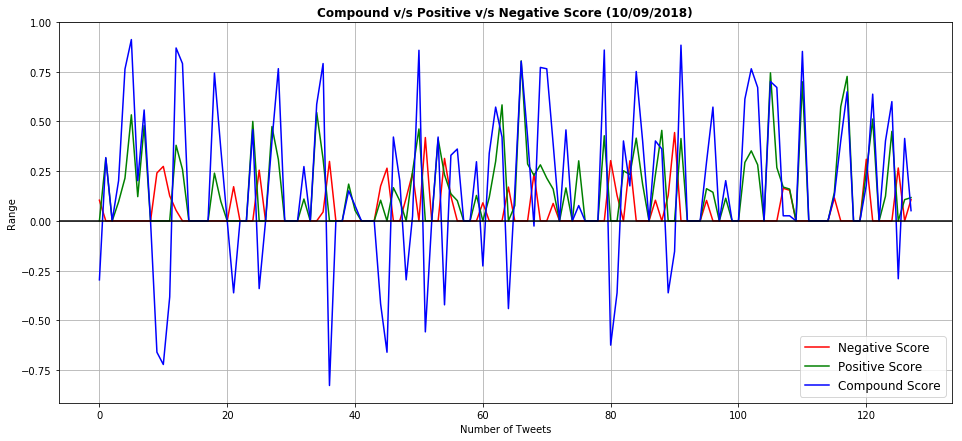

In [31]:
# Visualzation of Positive v/s Negative Score of Tweets
plt.plot(tweets_table["Negative Score"],color="r")
plt.plot(tweets_table["Positive Score"],color="g")
plt.plot(final_df['Compound Score'], color="blue")

#Size of the figure
plt.rcParams["figure.figsize"] = [16,7]


plt.title("Compound v/s Positive v/s Negative Score (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Range")
plt.xlabel("Number of Tweets")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)

# Bold the line starting at 0
plt.axhline(y=0, color = 'black')

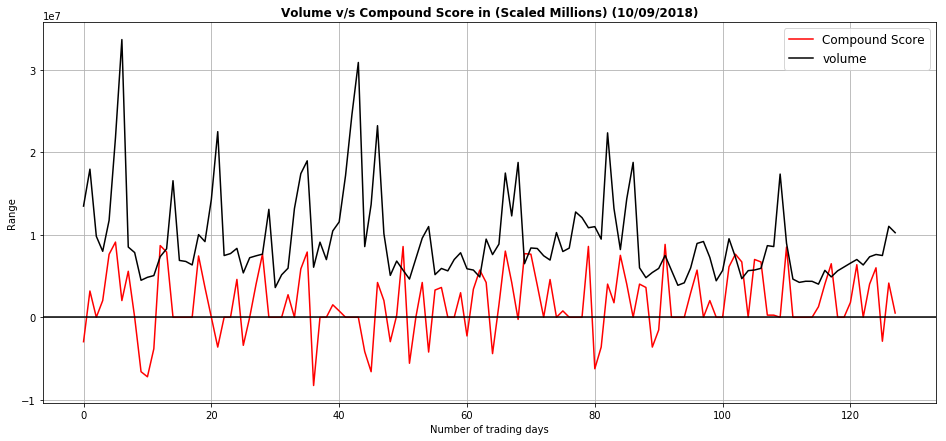

In [32]:
# Compound Score Scaled to Millions to Compare Volume for plotting the data.

plt.plot(final_df["Compound Score"]*10000000,color="red")
plt.plot(sorted_tsla_df["volume"],color="black")

#Size of the figure
plt.rcParams["figure.figsize"] = [16,7]

plt.title("Volume v/s Compound Score in (Scaled Millions) (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Range")
plt.xlabel("Number of trading days")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)

# Bold the line starting at 0
plt.axhline(y=0, color = 'black')

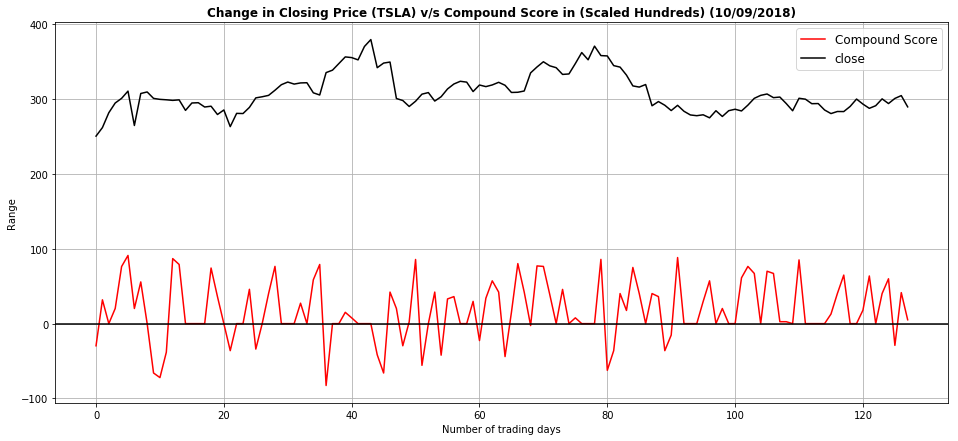

In [14]:
# Compound Score Scaled to Hundereds to compare Closing Price of TSLA for plotting the data.

plt.plot(final_df["Compound Score"]*100,color="red")
plt.plot(sorted_tsla_df["close"],color="black")

#Size of the figure
plt.rcParams["figure.figsize"] = [16,7]

plt.title("Change in Closing Price (TSLA) v/s Compound Score in (Scaled Hundreds) (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Range")
plt.xlabel("Number of trading days")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)

# Bold the line starting at 0
plt.axhline(y=0, color = 'black')


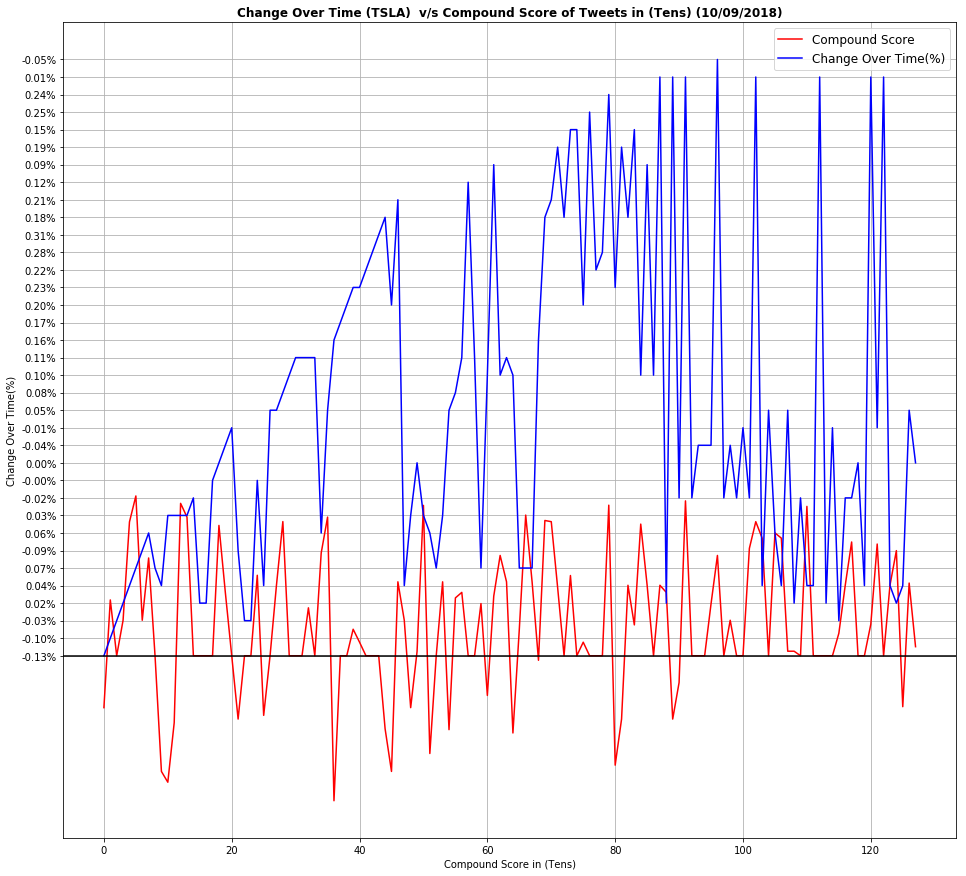

In [18]:
# Compound Score Scaled to tens just to compare Change Over Time(%) for plotting the data.

plt.plot(tweets_table["Compound Score"]*10,color="red")
plt.plot(final_df["Change Over Time(%)"],color="b")

#Size of the figure
plt.rcParams["figure.figsize"] = [16,12]

plt.title("Change Over Time (TSLA)  v/s Compound Score of Tweets in (Tens) (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Change Over Time(%)")
plt.xlabel("Compound Score in (Tens)")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)

# Bold the line starting at 0
plt.axhline(y=0, color = 'black')

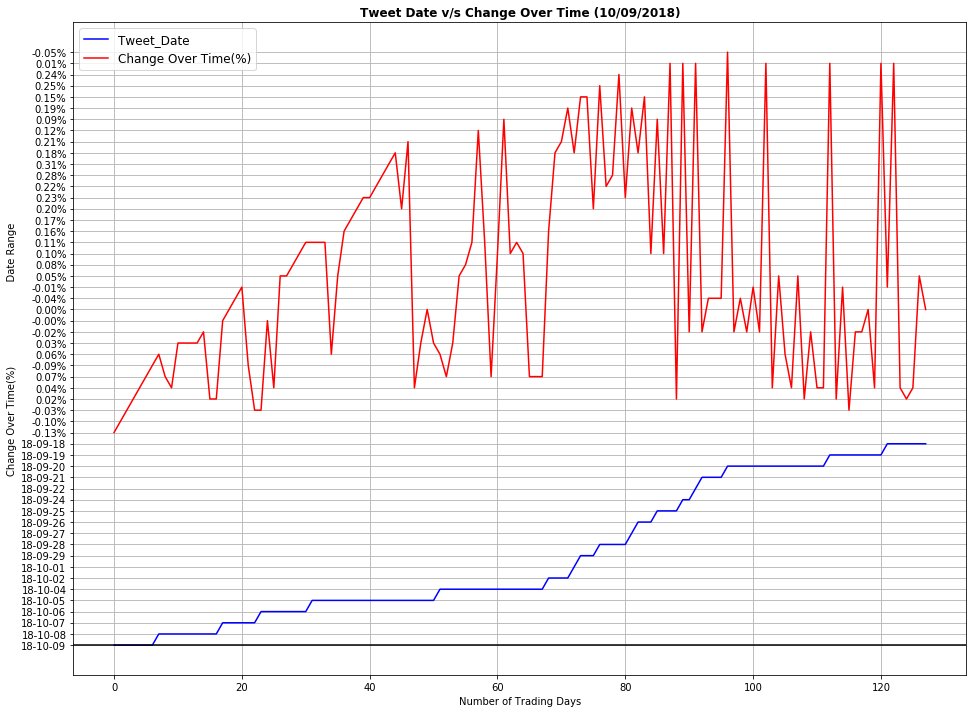

In [16]:
#Tweet Date vs Change Over Time(TSLA)(Visualize Stock Volatility Date wise)

plt.plot(final_df["Tweet_Date"],color="b")

#Size of the figure
plt.rcParams["figure.figsize"] = [16,15]

plt.ylabel("Change Over Time(%)")
plt.xlabel("Tweet Date")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)

plt.plot(final_df["Change Over Time(%)"],color="r")

#Size of the figure
plt.rcParams["figure.figsize"] = [16,15]
plt.title("Tweet Date v/s Change Over Time (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Change Over Time(%)                           Date Range")
plt.xlabel("Number of Trading Days")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)

# Bold the line starting at 0
plt.axhline(y=0, color = 'black')

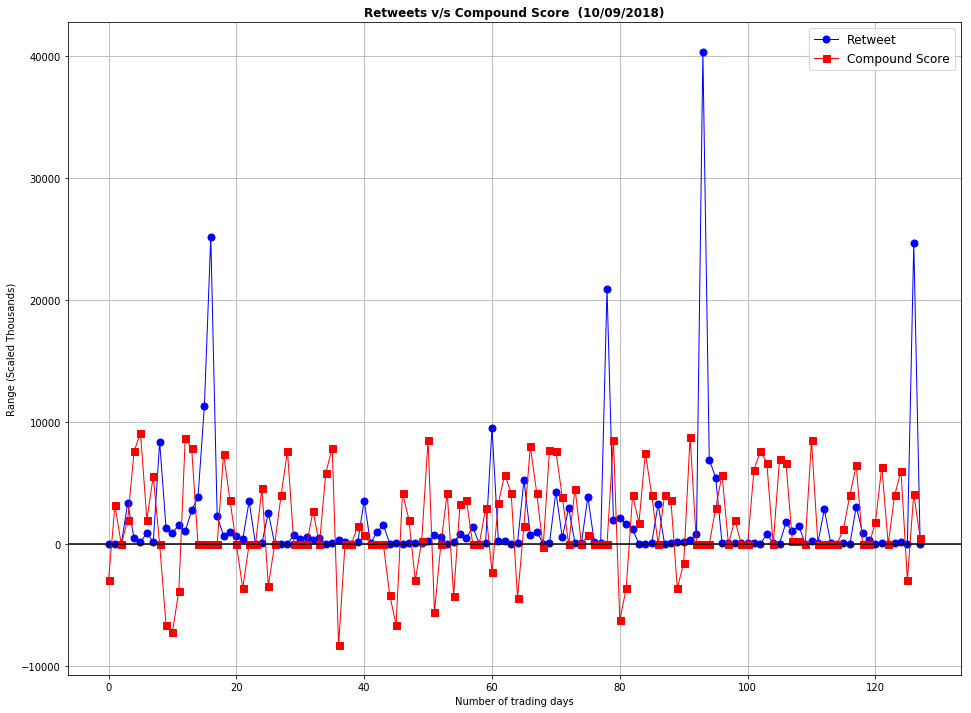

In [22]:
#No of Retweets compared to Compound score(Inverse Relationship)

plt.plot(final_df["Retweet"], "bo", linestyle="-", markersize=7, linewidth=1)
plt.plot(final_df["Compound Score"]*10000, "rs", linestyle="-", markersize=7, linewidth=1)

plt.title("Retweets v/s Compound Score  (%s)" % (time.strftime("%m/%d/%Y")),fontweight='bold')
plt.ylabel("Range (Scaled Thousands)")
plt.xlabel("Number of trading days")
plt.grid(True)
plt.legend(loc="best", fontsize="large", fancybox=True)

# Bold the line starting at 0
plt.axhline(y=0, color = 'black')

#Size of the figure
plt.rcParams["figure.figsize"] = [16,12]
